In [1]:
from niwidgets import NiWidget
import nilearn.plotting as nip
import warnings
warnings.filterwarnings('ignore')

/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


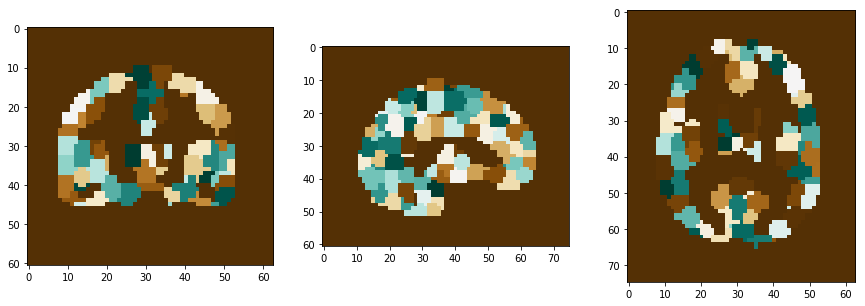

In [2]:
# Let's try a simple parcellation map from a standard atlas
from niwidgets import exampleatlas
test = NiWidget(exampleatlas)
test.nifti_plotter()

### Use standard plotting functions

`niwidgets` let's you turn standard plots from the nilearn package into widgets. You can use any of them, and provide your own keyword arguments to set the slider options (if no key word argument is provided defaults are used.

#### Glass Brain Plot

This is an example of a glass brain plot with a standard visual perception activation map from neurosynth.

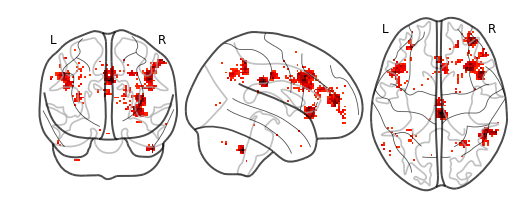

In [4]:
from niwidgets import examplezmap
test = NiWidget(examplezmap)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   threshold=(0.0, 10.0, 0.01),
                   display_mode=['ortho','xz'],
                   colormap='viridis')

#### Image slicer that ships with nilearn

Also using an example T1 data set.

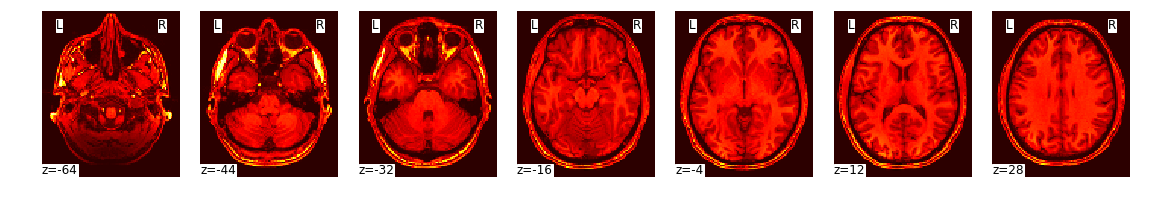

In [5]:
from niwidgets import examplet1
test = NiWidget(examplet1)
test.nifti_plotter(plotting_func=nip.plot_img, display_mode=['ortho', 'x', 'y', 'z'], colormap='hot')